### COVID 19 with Julia

In [ ]:
using InstantiateFromURL
github_project("vnegi10/covid19-notebooks-julia", path="", version = "master", force = true)

In [5]:
# Load and compile Julia packages for the current session
# This might take a while, needs to be done only once
# Recommended to list and compile all packages at once

using Distributions
using StatsBase
using CSV
using DataFrames
using StatsPlots
using Plots
gr()
using Dates

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


### Importing data

I made use of COVID-19 data from the well-known GitHub repository maintained by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. The data is in CSV format and is updated daily. 

In [6]:
file = download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
    "covid_19_global_data.csv"); # source of the data

data_df = DataFrame!(CSV.File("covid_19_global_data.csv")); # read data from file into a DataFrame

### A first look

Before moving, lets take a look at our data. I want to know more 
about its structure, size and type.

In [2]:
size(data_df)

UndefVarError: UndefVarError: data_df not defined

In [5]:
first(data_df,10)

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [6]:
describe(data_df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Province/State,,Alberta,,Zhejiang,83,188,"Union{Missing, String}"
2,Country/Region,,Afghanistan,,Zimbabwe,191,,String
3,Lat,20.8178,-51.7963,22.0414,71.7069,,1,"Union{Missing, Float64}"
4,Long,23.4393,-172.105,20.9727,178.065,,1,"Union{Missing, Float64}"
5,1/22/20,2.04797,0,0.0,444,,,Int64
6,1/23/20,2.41328,0,0.0,444,,,Int64
7,1/24/20,3.47232,0,0.0,549,,,Int64
8,1/25/20,5.29151,0,0.0,761,,,Int64
9,1/26/20,7.8155,0,0.0,1058,,,Int64


In [7]:
#list all columns
names(data_df)

337-element Array{String,1}:
 "Province/State"
 "Country/Region"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "12/8/20"
 "12/9/20"
 "12/10/20"
 "12/11/20"
 "12/12/20"
 "12/13/20"
 "12/14/20"
 "12/15/20"
 "12/16/20"
 "12/17/20"
 "12/18/20"
 "12/19/20"

## Prepare a function for select a Country from DataFrame

I will write a function that selects only the rows with ‘Province/State’ missing and discard the rest. Then I can easily find the country by matching the ‘Country/Region’ entry with my supplied keyword. While exploring the data, I have already noted that country names are mentioned as Australia, Germany, India etc, so my input keywords should match the same.


In [9]:
function find_country(data_df,country::String)
    data_df_new = data_df[ismissing.(data_df[!,Symbol("Province/State")]), :] # keep only rows with missing entry for "Province/State", total numbers for countries can be read this way
    loc = findfirst(data_df_new[!,Symbol("Country/Region")] .== country) # find the index of the row containing country
    return data_df_new[loc,:] # select the matching row
end

find_country (generic function with 1 method)

## Adjust format Dates

date_strings = names(data_df)[5:end]; # read dates from the column names
format = Dates.DateFormat("m/d/y")    # specify given format
x = parse.(Date, date_strings, format) .+ Year(2000) # Year(2000) converts year from 0020 to 2020

In [11]:
### Creating input data for a list countries

In [15]:
list_paises = unique(data_df["Country/Region"])

191-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 ⋮
 "Ukraine"
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [22]:
countries = ["US","France","Italy","Brazil","Mexico"]

5-element Array{String,1}:
 "US"
 "France"
 "Italy"
 "Brazil"
 "Mexico"

In [23]:
y = DataFrame() # empty dataframe

for country in countries    
    data_dfr = find_country(data_df,country); # returns a dataframe row 
    data_dfr = DataFrame(data_dfr);           # convert dataframe row back to a dataframe
    rows, cols = size(data_dfr);
    data_dfl = stack(data_dfr, 5:cols);       # convert dataframe into long format
    y[!,Symbol("$country")] = data_dfl[!,:value]
end

In [24]:
last(y,20)

,US,France,Italy,Brazil,Mexico
,Int64,Int64,Int64,Int64,Int64
1,13599496,2223393,1601554,6335878,1113543
2,13783773,2231344,1620901,6386787,1122362
3,13985434,2245324,1641610,6436650,1133613
4,14205041,2257894,1664829,6487084,1144643
5,14434647,2269080,1688939,6533968,1156770
6,14650139,2281889,1709991,6577177,1168395
7,14830883,2292838,1728878,6603540,1175850
8,15020042,2296249,1742557,6623911,1182249
9,15239976,2309760,1757394,6674999,1193255


### Bringing it all together — It’s time to plot!

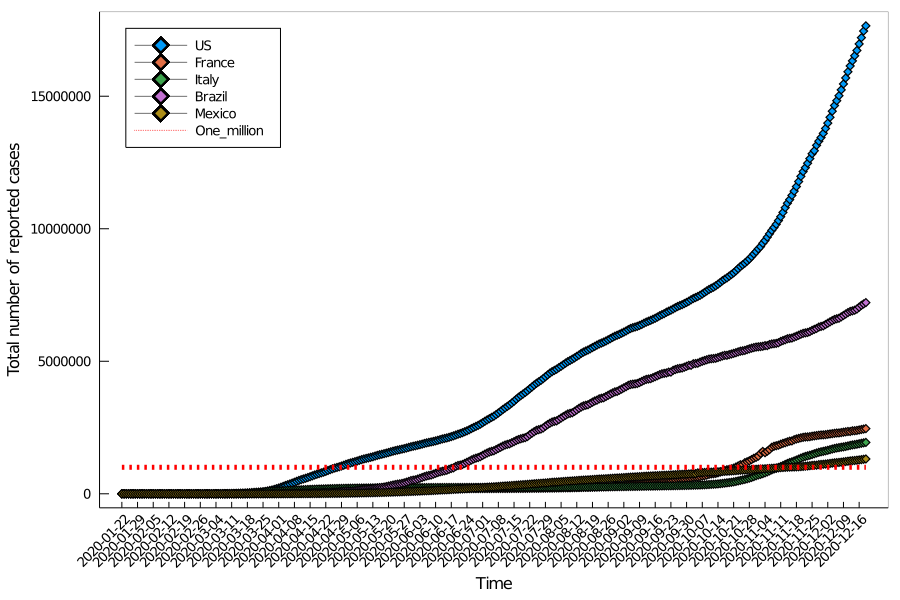

In [25]:
rows,cols = size(y)

gr(size=(900,600))
@df y plot(x, cols(1:cols), 
    label =  reshape(names(y),(1,length(names(y)))),
    xlabel = "Time",
    ylabel = "Total number of reported cases",
    xticks = x[1:7:end],
    xrotation = 45,
    marker = (:diamond,4),
    line = (:line, "gray"),
    legend = :topleft,
    grid = false,
    framestyle = :semi,
    legendfontsize = 9,
    tickfontsize = 9,
    formatter = :plain
    )

y.One_million = Array{Union{Missing,Int64},1}(missing,size(y,1));
y.One_million .= 10^6;

display(@df y plot!(x, y[!,cols+1],
       linestyle = :dot,
       linewidth = 5,
       color = :red,
       label = names(y)[cols+1]))

y = select!(y, Not([:One_million])); # remove column One_million

### Calculating the number of daily reported cases

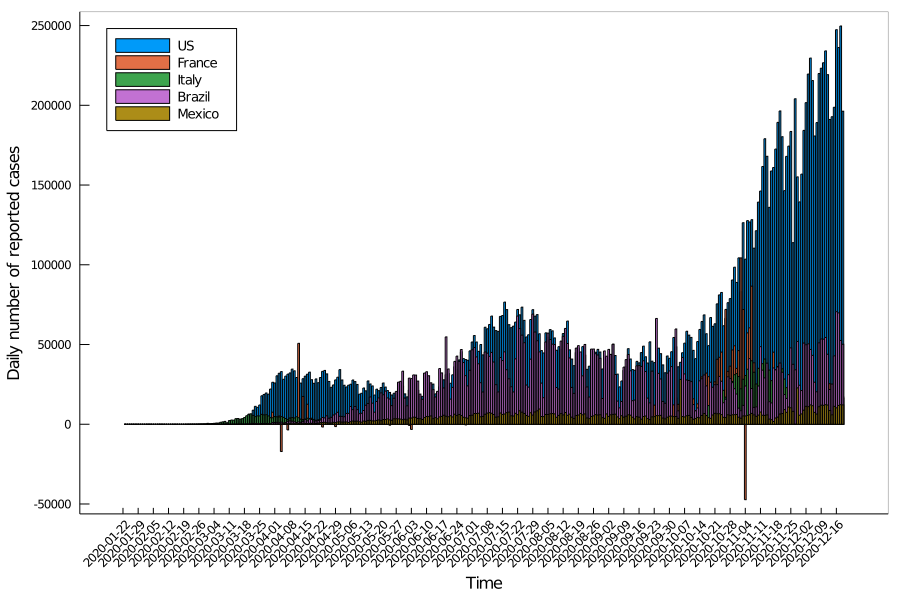

In [26]:
############################ Calculate number of daily reported cases ####################################


y_tmp = deepcopy(y);               # creates an independent copy, changes in y_tmp won't affect y
rows,cols = size(y_tmp)
dfrows = nrow(y_tmp);
name = names(y_tmp);

y_daily = similar(y_tmp,dfrows-1); # copy the structure to an empty dataframe with dfrows-1 rows

for j = 1:length(name)
    for i = 1:dfrows-1
        y_daily[!,name[j]][i] = y_tmp[!,name[j]][i+1] - y_tmp[!,name[j]][i] # calculate number of daily increase in reported cases by subtracting numbers of previous day
    end
end

x_daily = deepcopy(x);
popfirst!(x_daily);                # remove first entry, daily increase can only be reported from the next date

gr(size=(900,600))
display(@df y_daily bar(x_daily, cols(1:cols), 
    label = reshape(names(y),(1,length(names(y)))),
    xlabel = "Time",
    ylabel = "Daily number of reported cases",
    xticks = x[1:7:end],
    xrotation = 45,
    legend = :topleft,
    grid = false,
    framestyle = :semi,
    legendfontsize = 9,
    formatter = :plain))

savefig("Daily_cases.png")

### Finding the top five countries with highest number of reported cases

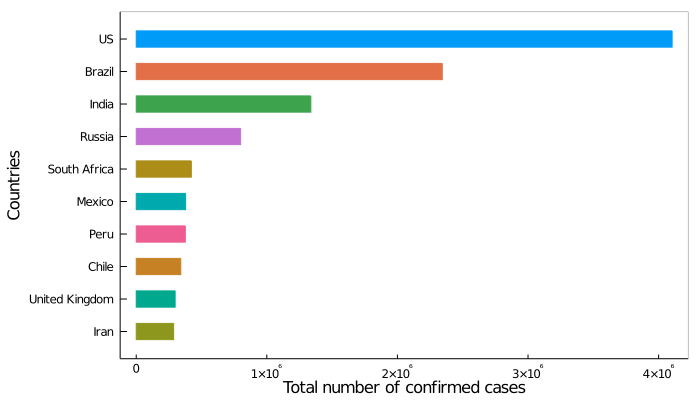

In [35]:
sort!(data_df,Symbol("7/24/20"),rev=true)               # sort original DataFrame in descending order based on values in last column (latest date)
countries_sort = data_df[1:10,Symbol("Country/Region")]  # list of top 5 countries
latest_reported_cases = data_df[1:10,Symbol("7/24/20")]  # number of reported cases in top 5 countries

gr(size=(700,400))
display(bar(countries_sort, latest_reported_cases,
    orientation = :h,
    xlabel = "Total number of confirmed cases",
    ylabel = "Countries",
    legend = false,
    color = collect(1:length(countries_sort)),
    bar_width = 0.50,
    linecolor = :match,
    yflip=true,
    grid = false,
    framestyle=:semi,
    ))

savefig("Top_five.png")

┌ Info: Saved animation to 
│   fn = /home/constantino/DataScience/Julia/Top_five_anim.gif
└ @ Plots /home/constantino/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/home/constantino/DataScience/Julia/Top_five_anim.gif")
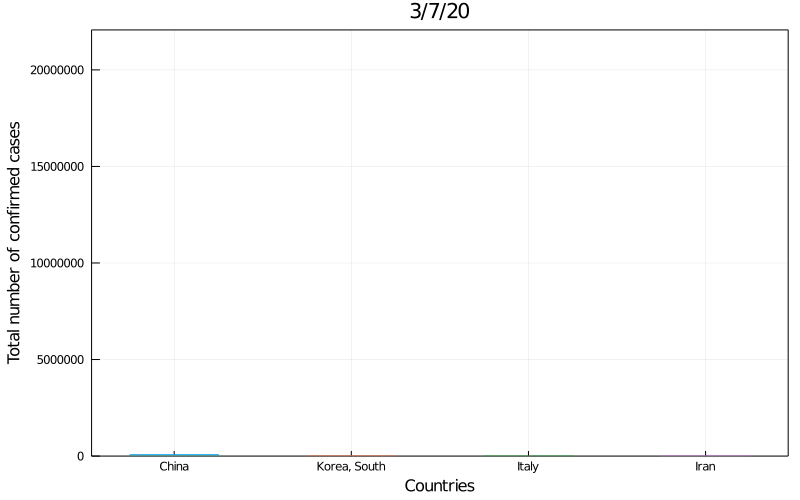

In [37]:
Top_five_anim = @animate for i in 50:length(names(data_df))  # loop through dates
    sort!(data_df, :($i), rev = true)                        # sort original DataFrame in descending order based on values in last column (latest date)
    countries_sort = data_df[1:5,Symbol("Country/Region")]   # list of top 5 countries
    latest_reported_cases = data_df[1:5,i]                   # number of reported cases in top 5 countries
    labels = string.(latest_reported_cases)
    
    gr(size=(800,500))
    bar(countries_sort, latest_reported_cases,
        ylabel = "Total number of confirmed cases",
        xlabel = "Countries",
        legend = false,
        color = collect(1:length(countries_sort)),
        title = names(data_df)[i],
        bar_width = 0.50,
        linecolor = :match,
        grid = true,
        framestyle = :box,
        formatter = :plain,
        fillalpha = 0.75
        )
     
    ylims!(0,1.25*maximum(data_df[!,length(names(data_df))])) # set a constant y-scale based on the maximum value
end
gif(Top_five_anim, "Top_five_anim.gif", fps = 2)              # output filename and frame rate

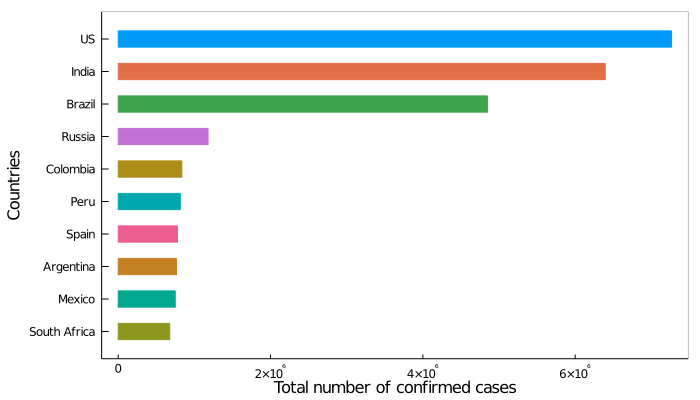

In [42]:
sort!(data_df,Symbol("10/1/20"),rev=true)               # sort original DataFrame in descending order based on values in last column (latest date)
countries_sort = data_df[1:10,Symbol("Country/Region")]  # list of top 5 countries
latest_reported_cases = data_df[1:10,Symbol("10/1/20")]  # number of reported cases in top 5 countries

gr(size=(700,400))
display(bar(countries_sort, latest_reported_cases,
    orientation = :h,
    xlabel = "Total number of confirmed cases",
    ylabel = "Countries",
    legend = false,
    color = collect(1:length(countries_sort)),
    bar_width = 0.50,
    linecolor = :match,
    yflip=true,
    grid = false,
    framestyle=:semi,
    ))

savefig("Top_five.png")